In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime

In [77]:
df = pd.read_csv('train.csv')
df2 = df.copy()
test = pd.read_csv('test.csv')
test2 = test.copy()

In [78]:
df2 = pd.read_csv('train.csv')

In [79]:
df2.head()

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,45654403,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6,Automatic,4x4,4-May,Left wheel,Silver,12,13328
1,44731507,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6,Tiptronic,4x4,4-May,Left wheel,Black,8,16621
2,45774419,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4,Variator,Front,4-May,Right-hand drive,Black,2,8467
3,45769185,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4,Automatic,4x4,4-May,Left wheel,White,0,3607
4,45809263,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4,Automatic,Front,4-May,Left wheel,Silver,4,11726


In [80]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                19237 non-null  int64 
 1   Levy              19237 non-null  object
 2   Manufacturer      19237 non-null  object
 3   Model             19237 non-null  object
 4   Prod. year        19237 non-null  int64 
 5   Category          19237 non-null  object
 6   Leather interior  19237 non-null  object
 7   Fuel type         19237 non-null  object
 8   Engine volume     19237 non-null  object
 9   Mileage           19237 non-null  object
 10  Cylinders         19237 non-null  int64 
 11  Gear box type     19237 non-null  object
 12  Drive wheels      19237 non-null  object
 13  Doors             19237 non-null  object
 14  Wheel             19237 non-null  object
 15  Color             19237 non-null  object
 16  Airbags           19237 non-null  int64 
 17  Price       

In [81]:
df2[df2['Price'] == 1]

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
7815,45765530,-,OPEL,Astra,1999,Sedan,Yes,Petrol,1.6,122231 km,4,Manual,Front,4-May,Left wheel,Silver,4,1
16992,45772201,1202,CHEVROLET,Lacetti,2006,Hatchback,No,Petrol,1.6,200000 km,4,Manual,Front,4-May,Left wheel,Black,2,1


In [82]:
test2[(test2['Manufacturer'] == 'OPEL') & (test2['Prod. year']<=1999)]

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
4,45814303,-,OPEL,Astra,1993,Hatchback,No,Petrol,1.6,200000 km,4,Manual,Front,4-May,Left wheel,Black,0
78,45793325,-,OPEL,Vectra,1999,Hatchback,No,CNG,1.8,30000 km,4,Manual,Front,4-May,Left wheel,Silver,4
109,45801493,-,OPEL,Astra,1992,Hatchback,No,CNG,1.6,10000 km,4,Manual,Front,4-May,Left wheel,Carnelian red,0
327,45785886,-,OPEL,Corsa,1997,Hatchback,No,Petrol,1.4,220000 km,4,Manual,Front,4-May,Left wheel,Carnelian red,2
349,45770466,-,OPEL,Astra,1997,Sedan,No,Petrol,1.6,0 km,4,Automatic,Front,4-May,Left wheel,Red,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7678,45798317,-,OPEL,Vectra,1999,Sedan,No,Petrol,1.8,222222 km,4,Manual,Front,4-May,Left wheel,Sky blue,4
7733,45808778,-,OPEL,Vectra,1992,Sedan,No,CNG,2,25000 km,4,Manual,Front,4-May,Left wheel,Grey,2
7980,45794535,-,OPEL,Astra,1996,Coupe,No,Petrol,2,999 km,4,Manual,Front,2-Mar,Left wheel,Green,2
8084,45789587,-,OPEL,Vectra,1997,Sedan,No,Petrol,1.6,250000 km,4,Manual,Front,>5,Left wheel,Beige,0


In [83]:
df2.groupby('Cylinders').mean().sort_values('Price',ascending=False)

,ID,Prod. year,Airbags,Price
Cylinders,,,,
12,4.519357e+07,2011.184211,10.368421,39757.131579
10,4.432546e+07,2008.416667,10.833333,31486.666667
8,4.545564e+07,2010.040363,6.349142,28198.847629
4,4.560082e+07,2011.377810,6.058607,18436.320874
16,4.577747e+07,2007.000000,8.800000,17519.800000
6,4.553892e+07,2009.558348,8.894281,16618.038417
1,4.533292e+07,2005.236842,3.263158,16375.105263
14,4.579753e+07,2009.000000,8.000000,15681.000000
5,4.549286e+07,2007.710059,6.940828,14640.213018


In [84]:
def cylinder_mean(s):
    if s == 12:
        s = 39757
    elif s == 10:
        s = 31486
    elif s == 8:
        s = 28198
    elif s == 4:
        s = 18436
    elif s == 16:
        s = 17519
    elif s == 6:
        s = 16618
    elif s == 1:
        s = 16375
    elif s == 14:
        s = 15681
    elif s == 5:
        s = 14640
    elif s == 2:
        s = 10358
    elif s == 3:
        s = 9879
    elif s == 7:
        s = 6446
    else:
        s = 2800
        
    return int(s)

In [85]:
# df['Cylinder_mean'] = df['Cylinders'].apply(cylinder_mean)

# test['Cylinder_mean'] = test['Cylinders'].apply(cylinder_mean)

In [86]:
def gear_box_mean(s):
    if s == 'Tiptronic':
        s = 26448
    elif s == 'Manual':
        s = 25614
    elif s == 'Automatic':
        s = 15974
    else:
        s = 14762
    return int(s)

In [87]:
# df['Gear box type_mean'] = df['Gear box type'].apply(gear_box_mean)

# test['Gear box type_mean'] = test['Gear box type'].apply(gear_box_mean)

In [88]:
def color_mean(s):
    if s == 'Blue':
        s = 33726
    elif s == 'Yellow':
        s = 20666
    elif s == 'Brown':
        s = 19709
    elif s == 'Grey':
        s = 19203
    elif s == 'Black':
        s = 18886
    elif s == 'White':
        s = 18204
    elif s == 'Carnelian red':
        s = 15820
    elif s == 'Beige':
        s = 15627
    elif s == 'Silver':
        s = 15091
    elif s == 'Golden':
        s = 14678
    elif s == 'Sky blue':
        s = 14079
    elif s == 'Red':
        s = 13553
    elif s == 'Orange':
        s = 13008
    elif s == 'Pink':
        s = 10649
    elif s == 'Green':
        s = 9449
    else:
        s = 8837
        
    return int(s)

In [89]:
# df['Color_mean'] = df['Color'].apply(color_mean)

# test['Color_mean'] = test['Color'].apply(color_mean)

In [90]:
df2

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,45654403,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6,Automatic,4x4,4-May,Left wheel,Silver,12,13328
1,44731507,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6,Tiptronic,4x4,4-May,Left wheel,Black,8,16621
2,45774419,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4,Variator,Front,4-May,Right-hand drive,Black,2,8467
3,45769185,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4,Automatic,4x4,4-May,Left wheel,White,0,3607
4,45809263,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4,Automatic,Front,4-May,Left wheel,Silver,4,11726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4,Manual,Rear,2-Mar,Left wheel,Silver,5,8467
19233,45778856,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4,Tiptronic,Front,4-May,Left wheel,Red,8,15681
19234,45804997,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4,Automatic,Front,4-May,Left wheel,Grey,4,26108
19235,45793526,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4,Automatic,Front,4-May,Left wheel,Black,4,5331


In [91]:
def category_mean(s):
    if s == 'Goods wagon':
        s = 122916
    elif s == 'Pickup':
        s = 28805
    elif s == 'Universal':
        s = 25253
    elif s == 'Cabriolet':
        s = 24583
    elif s == 'Jeep':
        s = 23684
    elif s == 'Coupe':
        s = 21250
    elif s == 'Minivan':
        s = 20531
    elif s == 'Microbus':
        s = 18550
    elif s == 'Sedan':
        s = 14231
    elif s == 'Limousine':
        s = 11534
    else:
        s = 11381
        
    return int(s)

In [92]:
# df['Category_mean'] = df['Category'].apply(category_mean)

# test['Category_mean'] = test['Category'].apply(category_mean)

In [93]:
def doors_mean(s):
    if s == '2-Mar':
        s = 50379
    elif s == '>5':
        s = 22299
    else:
        s = 17180
    return int(s)

In [94]:
# df['Doors_mean'] = df['Doors'].apply(doors_mean)

# test['Doors_mean'] = test['Doors'].apply(doors_mean)

In [95]:
# df['Wheel_mean'] = df['Wheel'].apply(lambda x: 19363 if x == 'Left wheel' else 8900)

# test['Wheel_mean'] = test['Wheel'].apply(lambda x: 19363 if x == 'Left wheel' else 8900)

In [96]:
df

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,45654403,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6,Automatic,4x4,4-May,Left wheel,Silver,12,13328
1,44731507,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6,Tiptronic,4x4,4-May,Left wheel,Black,8,16621
2,45774419,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4,Variator,Front,4-May,Right-hand drive,Black,2,8467
3,45769185,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4,Automatic,4x4,4-May,Left wheel,White,0,3607
4,45809263,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4,Automatic,Front,4-May,Left wheel,Silver,4,11726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4,Manual,Rear,2-Mar,Left wheel,Silver,5,8467
19233,45778856,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4,Tiptronic,Front,4-May,Left wheel,Red,8,15681
19234,45804997,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4,Automatic,Front,4-May,Left wheel,Grey,4,26108
19235,45793526,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4,Automatic,Front,4-May,Left wheel,Black,4,5331


In [97]:
df2

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,45654403,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6,Automatic,4x4,4-May,Left wheel,Silver,12,13328
1,44731507,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6,Tiptronic,4x4,4-May,Left wheel,Black,8,16621
2,45774419,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4,Variator,Front,4-May,Right-hand drive,Black,2,8467
3,45769185,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4,Automatic,4x4,4-May,Left wheel,White,0,3607
4,45809263,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4,Automatic,Front,4-May,Left wheel,Silver,4,11726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4,Manual,Rear,2-Mar,Left wheel,Silver,5,8467
19233,45778856,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4,Tiptronic,Front,4-May,Left wheel,Red,8,15681
19234,45804997,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4,Automatic,Front,4-May,Left wheel,Grey,4,26108
19235,45793526,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4,Automatic,Front,4-May,Left wheel,Black,4,5331


In [98]:
df2.groupby(['Prod. year', 'Cylinders']).mean().sort_values('Price',ascending=False)

ID    Airbags          Price
Prod. year Cylinders                                        
2020       8          4.579552e+07  12.000000  627220.000000
1999       4          4.567959e+07   3.414966  186062.530612
2017       1          4.458755e+07   0.000000  147397.000000
2019       8          4.541621e+07  10.300000  140659.100000
           12         4.577395e+07  12.000000  121524.000000
...                            ...        ...            ...
1947       6          3.816900e+07   0.000000     150.000000
2009       2          4.576165e+07   2.000000      60.000000
2007       7          4.574188e+07   9.000000      40.000000
2011       7          4.537004e+07  12.000000      30.000000
2020       12         4.581498e+07   0.000000       3.000000

[239 rows x 3 columns]

In [99]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,19237.0,4.557654e+07,936591.422799,20746880.0,45698374.0,45772308.0,45802036.0,45816654.0
Prod. year,19237.0,2.010913e+03,5.668673,1939.0,2009.0,2012.0,2015.0,2020.0
Cylinders,19237.0,4.582991e+00,1.199933,1.0,4.0,4.0,4.0,16.0
Airbags,19237.0,6.582627e+00,4.320168,0.0,4.0,6.0,12.0,16.0
Price,19237.0,1.855593e+04,190581.269684,1.0,5331.0,13172.0,22075.0,26307500.0


In [100]:
df2['Fuel type'].value_counts()

Petrol            10150
Diesel             4036
Hybrid             3578
LPG                 892
CNG                 494
Plug-in Hybrid       86
Hydrogen              1
Name: Fuel type, dtype: int64

<AxesSubplot:xlabel='Airbags', ylabel='Price'>

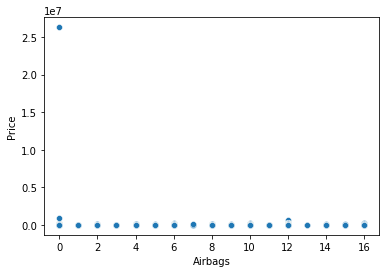

In [101]:
sns.scatterplot(data=df,x='Airbags',y='Price')

In [102]:
index = df[df['Price'] > 600000].index

In [103]:
df.drop(index=index, axis=1,inplace=True)

In [104]:
df.isnull().sum()

ID                  0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
Price               0
dtype: int64

C:\Users\akumar5\AppData\Local\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

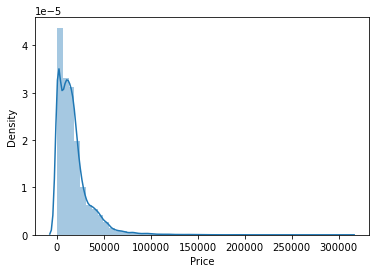

In [105]:
sns.distplot(df['Price'])

C:\Users\akumar5\AppData\Local\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

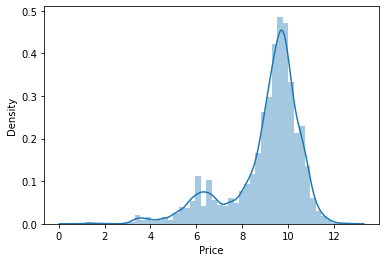

In [106]:
sns.distplot(np.log1p(df['Price']))

In [107]:
df['Model'].value_counts()

Prius             1083
Sonata            1079
Camry              938
Elantra            922
E 350              542
                  ... 
E 220 211            1
640 GRAN-COUPE       1
E 350 212            1
Optima hybid         1
21 3.0               1
Name: Model, Length: 1588, dtype: int64

In [108]:
# df['Model1'] = df['Model'].replace(regex=True, to_replace=r'', value=r'')

In [109]:
# df['Model1'] = df['Model'].str.split()[:-1]

In [110]:
# a = df['Model1'].iloc[305].split()[:-1]

In [111]:
# ''.join(a)

In [112]:
df['Price'].value_counts()

15681    280
470      274
14113    244
392      242
314      235
        ... 
14686      1
12639      1
18800      1
16753      1
16408      1
Name: Price, Length: 2312, dtype: int64

In [113]:
index2 = df[df['Price'] <10].index

In [114]:
df.drop(index=index2,axis=1,inplace=True)

In [115]:
df.drop('ID', axis=1, inplace=True)

test.drop('ID', axis=1, inplace=True)

In [116]:
df['Levy'] = df['Levy'].replace('-', 0)

test['Levy'] = test['Levy'].replace('-', 0)

In [117]:
def turbo_engine(text):
    if re.findall(r'\d{1,}.\d{1,} Turbo', text):
        text = 1
    else:
        text = 0
    return text

In [118]:
df['Turbo'] = df['Engine volume'].apply(turbo_engine)

test['Turbo'] = test['Engine volume'].apply(turbo_engine)

In [119]:
def engine_volume(text):
    if re.findall(r'\d{1,}.\d{1,} Turbo', text):
        text = text.replace('Turbo',  '')
    else:
        pass
    return float(text)

In [120]:
df['Engine volume'] = df['Engine volume'].apply(engine_volume)

test['Engine volume'] = test['Engine volume'].apply(engine_volume)

In [121]:
def mileage(text):
    if re.findall(r'\d{1,} km', text):
        text = text.replace(' km',  '')
    else:
        None
    return int(text)

In [122]:
df['Mileage'] = df['Mileage'].apply(mileage)

test['Mileage'] = test['Mileage'].apply(mileage)

In [123]:
def doors(text):
    if text == '>5':
        text = 6
    else:
        text = 5
    return text
    

In [124]:
df['No. of doors'] = df['Doors'].apply(doors)

test['No. of doors'] = test['Doors'].apply(doors)

In [125]:
# df.drop('Doors', axis=1, inplace=True)

# test.drop('Doors', axis=1, inplace=True)

In [126]:
price = df['Price']
df = df.drop('Price',axis=1)
df['label'] = 1
test['label'] = 2

concat_df_test = pd.concat([df , test])
df_objects = concat_df_test.select_dtypes(include='object')
df_numeric = concat_df_test.select_dtypes(exclude='object')

# Create your dummies
df_obj_dummies = pd.get_dummies(df_objects, drop_first=True)
features_df = pd.concat([df_obj_dummies, df_numeric], axis=1)

# Split your data
df = features_df[features_df['label'] == 1]
test = features_df[features_df['label'] == 2]

# Drop your labels
df = df.drop('label', axis=1)
df = pd.concat([df,price],axis=1)
test = test.drop('label', axis=1)

In [127]:
lst1 = [x for x in df.columns.tolist() if 'Model_' in x]
        
lst2 = ['Model'+str(x) for x in range(len(lst1))]

d = dict(zip(lst1, lst2))

df.rename(columns=d, inplace=True)
test.rename(columns=d, inplace=True)

In [128]:
# df.corr()['Price']

In [129]:
test.columns

Index(['Levy_1011', 'Levy_1016', 'Levy_1017', 'Levy_1018', 'Levy_1024',
       'Levy_1028', 'Levy_1030', 'Levy_1031', 'Levy_1032', 'Levy_1035',
       ...
       'Color_Sky blue', 'Color_White', 'Color_Yellow', 'Prod. year',
       'Engine volume', 'Mileage', 'Cylinders', 'Airbags', 'Turbo',
       'No. of doors'],
      dtype='object', length=2725)

In [130]:
# df_uint = df.select_dtypes(include='uint8')
# df_int64 = df.select_dtypes(include='int64')
# df_int64 = df_int64.astype(np.int16)
# df = pd.concat([df_int64, df_uint], axis=1)

# test_uint = test.select_dtypes(include='uint8')
# test_int64 = test.select_dtypes(include='int64')
# test_int64 = test_int64.astype(np.int16)
# test = pd.concat([test_int64, test_uint], axis=1)

In [131]:
X = df.drop('Price',axis=1)
y = df['Price']

In [132]:
# df.drop('Manufacturer_სხვა',axis=1,inplace=True)

# test.drop('Manufacturer_სხვა',axis=1,inplace=True)

In [133]:
from sklearn.model_selection import train_test_split

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [135]:
from sklearn.preprocessing import MinMaxScaler

In [136]:
scaler = MinMaxScaler()

In [137]:
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# test = scaler.transform(test)

In [138]:
from sklearn.pipeline import Pipeline
from catboost import CatBoostRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor, StackingRegressor, VotingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error

In [212]:
def run_model(model, X_train, y_train, X_test, y_test):
    
    # Fit Model Training
    log_y_train = np.log1p(y_train)
    model.fit(X_train, log_y_train)
    
    # Get Metrics
    preds = model.predict(X_test)
    preds = abs(preds)

    rmsle = np.sqrt(mean_squared_log_error(y_test, np.expm1(preds)))
    print(f'RMSLE: {rmsle}')

In [215]:
# Fit Model Training
log_y = np.log1p(y)
model.fit(X, log_y)

# Get Metrics
preds = model.predict(test)
preds = abs(preds)
# preds = preds-0.5
# print(preds)

rmsle = np.sqrt(mean_squared_log_error(y_test, 40 + np.expm1(preds)))
# print(np.expm1(preds))
# preds_df = pd.DataFrame(np.expm1(preds), columns=['Preds'])
# print(f'RMSLE: {rmsle}')

ValueError: Found input variables with inconsistent numbers of samples: [4803, 8245]

In [198]:
preds_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Preds,8245.0,15377.797015,20091.316095,16.132453,4157.378398,10982.814352,20073.212587,1.054616e+06


In [222]:
def rmsle(num):
    if num <=100:
        num += 2
    elif num >100 and num<1000:
        num += 5
    elif num >=1000 and num<10000:
        num += 200
    elif num>=10000 and num<100000:
        num+=500
    return num

In [223]:
preds_df['over_preds'] = preds_df['Preds'].apply(rmsle)

In [208]:
over_estimation = preds_df['over_preds'].values

In [225]:
preds_df.to_csv('Pred.csv',index=False)

In [217]:
over_estimation.shape

(8245,)

In [224]:
preds_df

,Preds,over_preds
0,17988.163684,18488.163684
1,11757.640574,12257.640574
2,8344.222685,8544.222685
3,2798.107610,2998.107610
4,2669.170255,2869.170255
...,...,...
8240,9033.721010,9233.721010
8241,27110.143093,27610.143093
8242,515.609305,520.609305
8243,45674.519294,46174.519294


In [199]:
1.054616e+06

1054616.0

In [173]:
preds_df.to_csv('preds.csv',index=False)

In [183]:
preds_df[preds_df['Preds'] <1000]

,Preds
6,515.609305
12,329.686616
24,270.821892
25,270.821892
31,622.562686
...,...
8226,563.656033
8227,58.286783
8235,270.821892
8242,515.609305


In [190]:
d = pd.read_csv('preds.csv')

In [194]:
df2 = pd.read_csv('train.csv')

In [195]:
df2.corr()['Price']

ID           -0.000844
Prod. year    0.012982
Cylinders     0.007518
Airbags      -0.012824
Price         1.000000
Name: Price, dtype: float64

In [193]:
d.corr()['Preds']

ID           -0.004239
Prod. year    0.246589
Cylinders     0.052169
Airbags      -0.025586
Preds         1.000000
Name: Preds, dtype: float64

In [186]:
concat_df = pd.concat([test2,preds_df],axis=1)

In [189]:
concat_df.to_csv('preds.csv',index=False)

In [65]:
model = lgb.LGBMRegressor()

run_model(model, X_train, y_train, X_test, y_test)

RMSLE: 1.011251737127132


In [213]:
model = lgb.LGBMRegressor(boosting_type='gbdt', n_estimators=760, max_depth=-1, learning_rate=0.11, num_leaves=31)

run_model(model, X_train, y_train, X_test, y_test)

RMSLE: 0.9578349385264114


In [67]:
model = lgb.LGBMRegressor(boosting_type='gbdt', n_estimators=760, max_depth=-1, learning_rate=0.11, num_leaves=31)
# model = RandomForestRegressor(n_estimators=500, max_features=500)

log_y = np.log1p(y)
model.fit(X, log_y)
predictions = pd.DataFrame(np.expm1(model.predict(test)), columns=['Price'])
predictions.to_csv('predictions.csv',index=False)

In [68]:
# param_grid = {'boosting_type': ['gbdt','dart','goss','rf'], 'num_leaves':[31, 40, 50, 75, 100],
#              'max_depth':[-1,1,10], 'learning_rate':[0.001,0.01,0.05,0.1,0.3,0.5,1],
#              'n_estimators':[100,500,1000,2000,3000,5000,10000]}

In [69]:
# model = RandomForestRegressor()

# run_model(model, X_train, y_train, X_test, y_test)

In [70]:
# model = RandomForestRegressor(n_estimators=500, max_features=500)

# run_model(model, X_train, y_train, X_test, y_test)

In [71]:
# model = AdaBoostRegressor()

# run_model(model, X_train, y_train, X_test, y_test)

In [72]:
# model = GradientBoostingRegressor()

# run_model(model, X_train, y_train, X_test, y_test)

In [73]:
# model = CatBoostRegressor()

# run_model(model, X_train, y_train, X_test, y_test)

In [74]:
# model = xgb.XGBRegressor()

# run_model(model, X_train, y_train, X_test, y_test)

In [75]:
# model = xgb.XGBRFRegressor()

# run_model(model, X_train, y_train, X_test, y_test)